#Stability

$$
\newcommand{\DdQq}[2]{{\mathrm D}_{#1}{\mathrm Q}_{#2}}
\newcommand{\drondt}{\partial_t}
\newcommand{\drondx}{\partial_x}
\newcommand{\drondtt}{\partial_{tt}}
\newcommand{\drondxx}{\partial_{xx}}
\newcommand{\dx}{\Delta x}
\newcommand{\dt}{\Delta t}
\newcommand{\grandO}{{\mathcal O}}
\newcommand{\density}[2]{\,f_{#1}^{#2}}
\newcommand{\fk}[1]{\density{#1}{\vphantom{\star}}}
\newcommand{\fks}[1]{\density{#1}{\star}}
\newcommand{\moment}[2]{\,m_{#1}^{#2}}
\newcommand{\mk}[1]{\moment{#1}{\vphantom{\star}}}
\newcommand{\mke}[1]{\moment{#1}{e}}
\newcommand{\mks}[1]{\moment{#1}{\star}}
\newcommand{\norm}[1]{||#1||}
$$

The stability of a numerical simulation is a fundamental property that is more complicated to apprehend compared to finite differences schemes. The reason is that the additional moments have to be taken into account.

In this practical session, two notions of stability are investigated on a very simple model. 

##Monotonic stability

Let us consider a $\DdQq{d}{q}$ lattice Boltzmann scheme. The idea is to control the $L^1$-norm of the distribution functions:

$$ {\norm{\fk{}}}_1(t) = \sum_{x\in{\mathbb R}^d} \sum_{i=0}^{q-1} |\fk{i}(x,t)|.$$
As the total mass is conserved by the scheme, a sufficient condition to control the $L^1$-norm is that the distribution functions $\fk{i}$, $0\leq i\leq q-1$ remain non negative. 

####Definition (monotonic stability)

*We suppose that at initial time ($t=0$)*

* *the distribution functions are nonnegative,* 
$$\fk{i}(x,0)\geq0,\quad 0\leq i\leq q-1, \quad x\in{\mathbb R},$$
* *the total mass is bounded.*
$$ \sum_{x\in{\mathbb R}^d} \sum_{i=0}^{q-1} \fk{i}(x,0) < +\infty.$$

*The scheme is said monotonically stable if these two properties are verified at every time.*

As the transport phase just exchanges the position of the distribution functions, the non negativity of the distribution functions is ascertained by the following property:

####Property (monotonic stability)

*If the relaxation operator is nonnegative-that is if it transforms a nonnegative vector into a nonnegative vector-then the scheme is monotonically stable.*

In the case of a linear scheme, the relaxation operator reads 
$$ R = M^{-1} (I - S + S E) M,$$
where $M$ is the matrix of the moments ($M_{kj} = P_k(v_j)$), $I$ the identity matrix, $S$ the diagonal matrix of the relaxation parameters, and $E$ the equilibrium matrix.

The scheme is then monotonically stable if the matrix $R$ has nonnegative coefficients.

The module pyLBM can compute the matrix of the relaxation operator for a linear scheme (In the case of a nonlinear equilibrium, the stability can be investigated around a constant state).
This matrix is computed if the dictionary that defines the scheme contains the key `stability`:{} (the value of the key can be the empty dictionary or another dictionaries with more details). The monotonical stability is then tested by using the function is_monotonically_stable() of the class scheme.

####Question 1

Propose a function that returns a scheme $\DdQq{1}{2}$ for the advection. 
This function should depend on two parameters: the velocity $c$ of the advection and the relaxation parameter $s$.
The scheme is defined by
* the scheme velocity $\lambda=1$,
* two velocities $v_0 = 1$ and $v_1=-1$,
* two polynomials $P_0=1$ and $P_1=X$,
* the first moment $u$ is conserved, and the second one $v$ relaxes toward $cu$ with a relaxation parameter $s$.

####Question 2

Build the matrix of the relaxation $R$ for $c=0.3$ and $s=1.5$. Compare the result with the matrix given by pyLBM (amplification_matrix_relaxation)

####Question 3

Test the monotonical stability of this scheme for various parameters. In particular, you could represent graphically the array of stability in the space $(c, s)$.


[[ 0.475  0.975]
 [ 0.525  0.025]]
[[ 0.475  0.975]
 [ 0.525  0.025]]


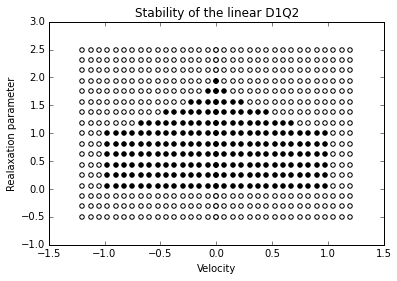

In [1]:
import numpy as np
import pylab as plt
%matplotlib inline
import sympy as sp
import pyLBM

u, X = sp.symbols('u, X')

def scheme_constructor(c, s, test=False):
    dico = {
        'dim':1,
        'scheme_velocity':1.,
        'schemes':[
            {
            'velocities':range(1, 3),
            'conserved_moments':u,
            'polynomials':[1, X],
            'relaxation_parameters':[0., s],
            'equilibrium':[u, c*u],
            'init':{u:0.},
            },
        ],
        'stability':{'test_L2_stability':test},
    }
    return pyLBM.Scheme(dico)

c, s = 0.3, 1.5
S = scheme_constructor(c, s)
print S.amplification_matrix_relaxation

M = np.array([[1.,1.],[1.,-1.]])
invM = np.array([[.5,.5],[.5,-.5]])
iD = np.eye(2)
E = np.array([[1.,0.],[c,0.]])
S = np.array([[0.,0.],[0.,s]])
R =  np.dot(np.dot(invM, iD + np.dot(S, E - iD)), M)
print R

plt.figure(1)
plt.title('Stability of the linear D1Q2')
plt.xlabel('Velocity')
plt.ylabel('Realaxation parameter')
Nc, Ns = 16, 16
vc = np.linspace(0., 1.2, Nc+1)
vs = np.linspace(-.5, 2.5, Ns+1)
for c in vc:
    for s in vs:
        S = scheme_constructor(c, s)
        if S.is_monotonically_stable():
            plt.scatter([c, -c], [s, s], c = 'k', marker = 'o')
        else:
            plt.scatter([c, -c], [s, s], c = 'w', marker = 'o')

##Von Neumann Stability

Another notion of stability is associated to the eigenvalues of the operator in the Fourier space, this notion being limited to linear schemes). As the relaxation operator is local in space, the transformation into the Fourier space impacts only on the transport operator that becomes a simple multiplication by complex numbers.

The module pyLBM computes the matrix of the total scheme operator in the Fourier space for a given wave vector (function amplification_matrix), its eigenvalues (function vp_amplification_matrix) or can also test the stability for a wide range of wave vectors (function is_L2_stable).

####Question 4

Test the functions of the module pyLBM on the $\DdQq{1}{2}$ of the previous section. 

####Question 5

Propose a graphical representation of the eigenvalues for a given velocity $c$ and various relaxation parameters $s$. 

The scheme is stable for the norm L2


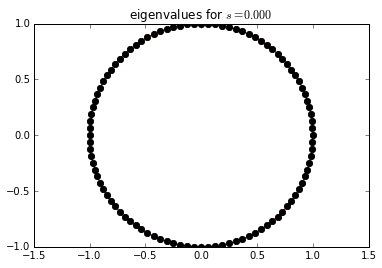

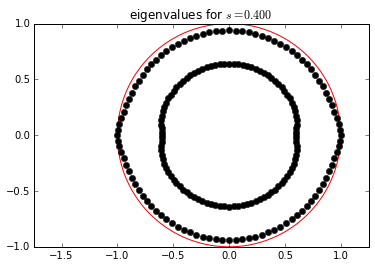

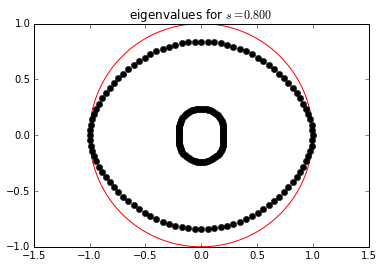

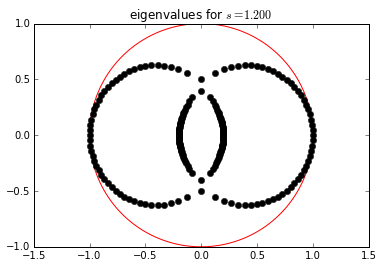

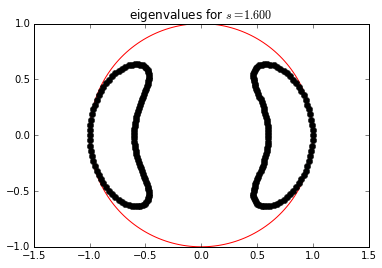

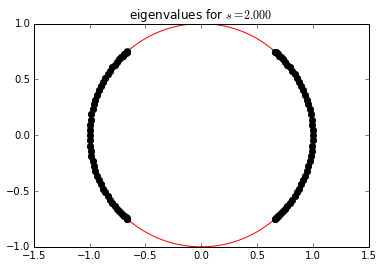

In [2]:
def vp_plot(c):
    Nk = 100
    vkx = np.linspace(0., 2*np.pi, Nk+1)
    Ns = 5
    cf = 0
    for s in np.linspace(0., 2., Ns+1):
        cf += 1
        S = scheme_constructor(c, s)
        R = 1.
        plt.figure(cf)
        plt.axis('equal')
        plt.plot(np.cos(np.linspace(0., 2.*np.pi, 200)),
            np.sin(np.linspace(0., 2.*np.pi, 200)), 'r')
        for k in range(Nk):
            vp = S.vp_amplification_matrix((vkx[k],))
            rloc = max(np.abs(vp))
            plt.plot(vp.real, vp.imag, 'ko')
            if rloc>R+1.e-14:
                R = rloc
        if R>1+1.e-14:
            print "instable scheme for s={0:5.3f}".format(s)
        plt.title('eigenvalues for $s = {0:5.3f}$'.format(s))
        plt.pause(1.e-1)

S = scheme_constructor(0.75, 1.9, test=True)
vp_plot(.75)

In [12]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()